<a href="https://colab.research.google.com/github/yoonjong8739/NLP_study/blob/master/_3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize  # 단어 토큰화
from nltk.stem import WordNetLemmatizer  # 표제어 추출
from sklearn.feature_extraction.text import TfidfVectorizer  # tfidf 벡터화
from sklearn.metrics.pairwise import cosine_similarity  # 코사인 유사도

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# jaccard_similarity 함수
def jaccard_similarity(d1, d2):
    lemmatizer = WordNetLemmatizer()

    words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

    inter = len(set(words1).intersection(set(words2)))
    union = len(set(words1).union(set(words2)))

    return inter / union

In [ ]:
d1 = "You can't succeed if you are afraid of failure."
d2 = "All our dreams can come true if we have the courage to pursue them."
d3 = "The future belongs to those who believe in the beauty of their dreams."

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.08695652173913043
0.09523809523809523
0.16666666666666666


In [ ]:
# 코사인 유사도
import numpy as np

tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(np.asarray(tfidf[0]), np.asarray(tfidf[1])))
print(cosine_similarity(np.asarray(tfidf[0]), np.asarray(tfidf[2])))
print(cosine_similarity(np.asarray(tfidf[1]), np.asarray(tfidf[2])))

[[0.10751228]]
[[0.05340521]]
[[0.19328077]]


## 한국어 형태소 분석기 설치

In [ ]:
!set -x \
&& pip install konlpy

+ pip install konlpy


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
# windows 환경에서는 에러 발생
#!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [ ]:
raw = [x.decode() for x in raw[1:10000]]

reviews = [i.split('\t')[1] for i in raw]  # 첫 번째 리뷰만 출력
print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [ ]:
from konlpy.tag import Okt

tagger = Okt()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ'], ['디자인', '을', '배우는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해가는', '문화', '산업', '이', '부러웠는데', '.', '사실', '우리나라', '에서도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같은', '전통', '이', '있어', '저', '와', '같은', '사람', '들', '이', '꿈', '을', '꾸고', '이뤄', '나갈', '수', '있다는', '것', '에', '감사합니다', '.'], ['폴리스스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴께', '하나', '도', '없음', '..', '최고', '.'], ['와', '..', '연기', '가', '진짜', '개', '쩔구나', '..', '지루할거라고', '생각', '했는데', '몰입', '해서', '봤다', '..', '그래', '이런게', '진짜', '영화', '지'], ['안개', '자욱한', '밤하늘', '에', '떠', '있는', '초승달', '같은', '영화', '.'], ['사랑', '을', '해본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃을수', '있는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오나요', '?', '나오면', '1', '빠', '로', '보고', '싶음'], ['굿'], ['바보', '가', '아니라', '병', '쉰', '인듯'], ['내', '나이', '와', '같은', '영화', '를', '지금', '본', '나', '는', '감동', '적', '이다', '..', '하지만', '훗날', '다시', '보면대'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [ ]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [ ]:
#model = Word2Vec(
#    sentences=data,
#    sg=1,  # skip-gram
#    vector_size=100,
#    window=3,  # 앞 뒤 몇 개의 단어까지 예측하는데 사용할 것인가?
#    min_count=3,  # 사용할 단어의 최소 빈도 수
#    workers=4  # 동시 처리 수
#)
word2vec = Word2Vec(sentences=reviews, min_count=5)
word2vec

In [ ]:
print(word2vec.wv['영화'], "\n")  # 단어를 벡터로 변환
print(word2vec.wv.most_similar('영화'))  # 가장 유사한 단어를 추출

[-0.14977859  0.5878565  -0.05800415  0.16124725  0.13938425 -0.5015604
  0.39016235  0.99880147 -0.42376313 -0.5056248  -0.08612798 -0.6485299
  0.05424586  0.29018462  0.24243197 -0.36577207  0.23392396 -0.31133425
 -0.13592432 -0.821004    0.25979045 -0.00259364  0.13813177 -0.24997431
 -0.15223275 -0.01374272 -0.34701172 -0.14034961 -0.33657044  0.17361486
  0.33433536  0.07230616 -0.03450955 -0.48534212 -0.40002325  0.6323879
  0.3547642  -0.07423477 -0.22785391 -0.5538098  -0.00159942 -0.07904898
 -0.06510145  0.07724559  0.6054998  -0.08185783 -0.11983356  0.05149678
  0.27057657  0.22064212  0.17233059 -0.5836668  -0.03278283 -0.20412241
 -0.32995376  0.11194906  0.19513577  0.08906477 -0.34097135  0.04714604
  0.10189089  0.05803179  0.32066765  0.05824208 -0.38129026  0.39268652
  0.01977987  0.50723326 -0.53041357  0.4840513  -0.10356107  0.2923238
  0.5434919  -0.0140478   0.46916187  0.29948336  0.12026817 -0.04331481
 -0.5392149  -0.3294694  -0.27997795  0.05769892 -0.472

* t-sne을 이용한 단어 벡터 시각화

In [ ]:
tsne = TSNE(n_components=2)
tsne

TSNE()

In [ ]:
import numpy as np

vocab = word2vec.wv.key_to_index
#vocab

def similarity(vocab):
    a = []
    for k,v in vocab.items():
        sim = word2vec.wv[str(k)]
        a.append(sim)
    return np.array(a)

similarity = similarity(vocab)
similarity

array([[-0.14072938,  0.6617482 , -0.01967449, ..., -0.42510554,
         0.36920726, -0.11266411],
       [-0.19428794,  0.6345685 ,  0.05468269, ..., -0.35859516,
         0.12771708, -0.11360515],
       [-0.14977859,  0.5878565 , -0.05800415, ..., -0.36355993,
         0.36979425, -0.13734655],
       ...,
       [-0.02166687,  0.04813987, -0.0021744 , ..., -0.01904552,
         0.01941251, -0.00415574],
       [-0.01936181,  0.05874189,  0.00088197, ..., -0.03922147,
         0.04173913, -0.02373775],
       [-0.0116819 ,  0.06125232,  0.0028415 , ..., -0.05247867,
         0.04772739, -0.02306796]], dtype=float32)

In [ ]:
similarity.shape

(3035, 100)

In [ ]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(data=transform_similarity, columns = ['x', 'y'])
df[:10]

,x,y
0,69.001472,-18.803402
1,60.225491,-17.992268
2,69.304382,-16.100988
3,71.252953,-17.917009
4,65.007622,-21.214083
5,69.287933,-20.316792
6,63.384510,-18.529467
7,67.998566,-19.945818
8,70.612839,-18.974821
9,70.674393,-18.463991


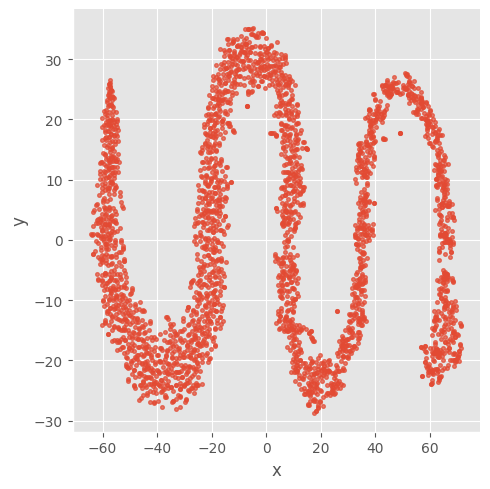

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

sns.lmplot(data = df, x = 'x', y = 'y', fit_reg=False, scatter_kws={'alpha':0.7, 's':7})
plt.show();

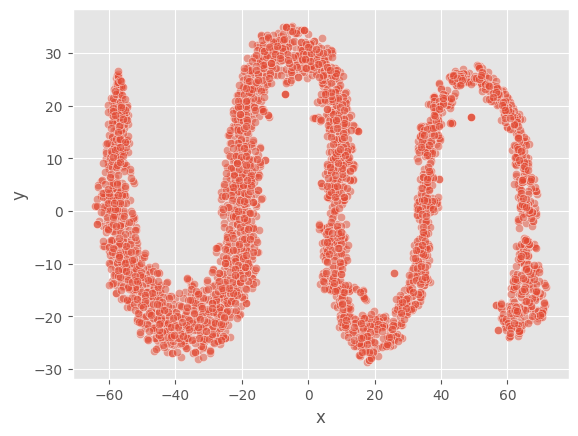

In [ ]:
sns.scatterplot(data=df, x='x', y='y', sizes=5, alpha=0.5)
plt.show();

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([5, 5, 5, ..., 4, 1, 1])

In [ ]:
results = df
results['predict'] = predict
results.head(10)

,x,y,predict
0,69.001472,-18.803402,5
1,60.225491,-17.992268,5
2,69.304382,-16.100988,5
3,71.252953,-17.917009,5
4,65.007622,-21.214083,5
5,69.287933,-20.316792,5
6,63.384510,-18.529467,5
7,67.998566,-19.945818,5
8,70.612839,-18.974821,5
9,70.674393,-18.463991,5


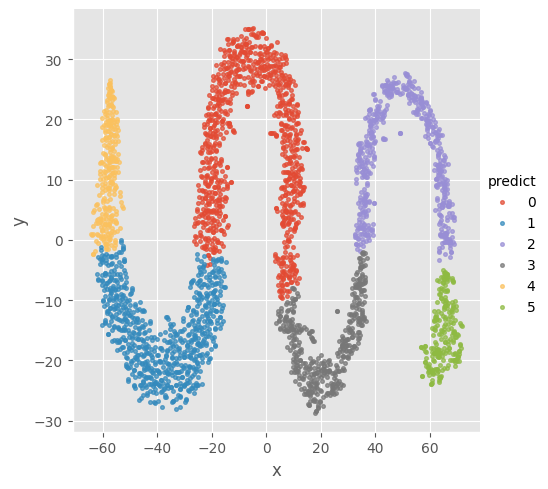

In [ ]:
sns.lmplot(data = results, x = 'x', y = 'y', fit_reg=False, scatter_kws={'alpha':0.7, 's':7}, hue="predict")
plt.show();

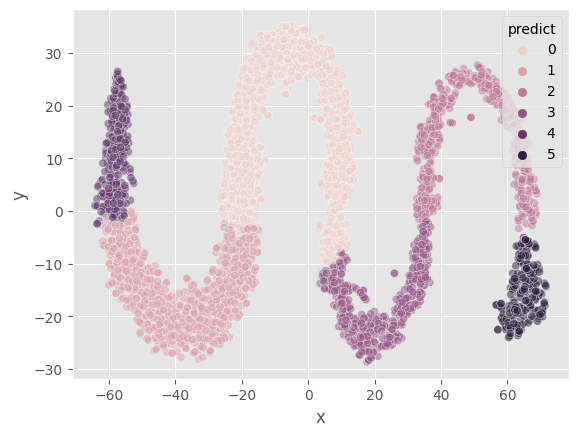

In [ ]:
sns.scatterplot(data=results, x='x', y='y', sizes=5, alpha=0.5, hue="predict")
plt.show();

#### average

In [ ]:
from sklearn.cluster import AgglomerativeClustering

avg = AgglomerativeClustering(n_clusters=6, linkage='average')
avg = avg.fit_predict(df)
predict

array([5, 5, 5, ..., 4, 1, 1])

In [ ]:
results2 = df
results2['predict'] = predict
results2.head(10)

,x,y,predict
0,69.001472,-18.803402,5
1,60.225491,-17.992268,5
2,69.304382,-16.100988,5
3,71.252953,-17.917009,5
4,65.007622,-21.214083,5
5,69.287933,-20.316792,5
6,63.384510,-18.529467,5
7,67.998566,-19.945818,5
8,70.612839,-18.974821,5
9,70.674393,-18.463991,5


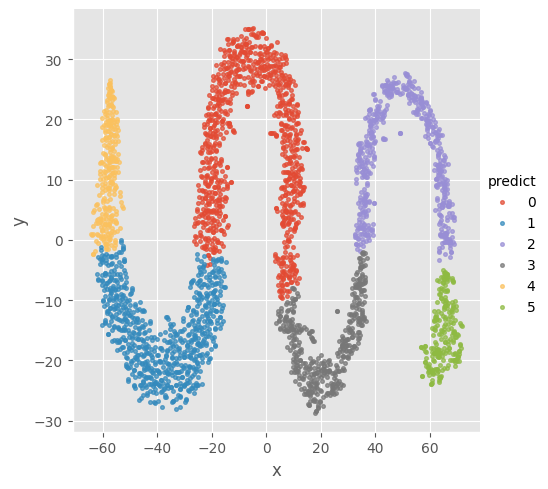

In [ ]:
sns.lmplot(data = results2, x = 'x', y = 'y', fit_reg=False, scatter_kws={'alpha':0.7, 's':7}, hue="predict")
plt.show();

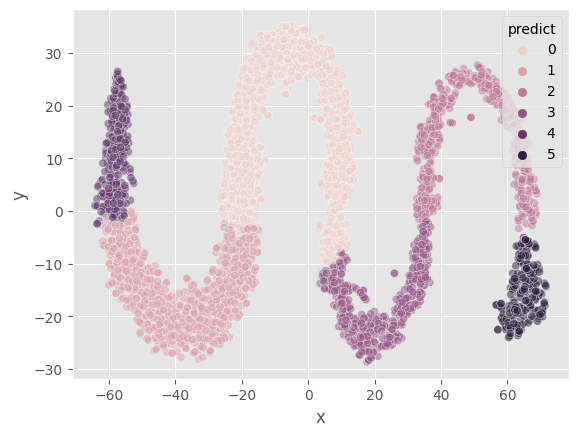

In [ ]:
sns.scatterplot(data=results2, x='x', y='y', sizes=5, alpha=0.5, hue="predict")
plt.show();

#### complete

In [ ]:
from sklearn.cluster import AgglomerativeClustering

complete = AgglomerativeClustering(n_clusters=6, linkage='complete')
complete = complete.fit_predict(df)
predict

array([5, 5, 5, ..., 4, 1, 1])

In [ ]:
results3 = df
results3['predict'] = predict
results3.head(10)

,x,y,predict
0,69.001472,-18.803402,5
1,60.225491,-17.992268,5
2,69.304382,-16.100988,5
3,71.252953,-17.917009,5
4,65.007622,-21.214083,5
5,69.287933,-20.316792,5
6,63.384510,-18.529467,5
7,67.998566,-19.945818,5
8,70.612839,-18.974821,5
9,70.674393,-18.463991,5


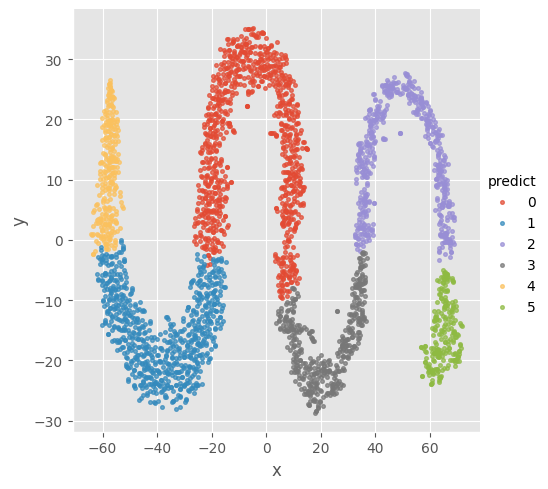

In [ ]:
sns.lmplot(data = results3, x = 'x', y = 'y', fit_reg=False, scatter_kws={'alpha':0.7, 's':7}, hue="predict")
plt.show();

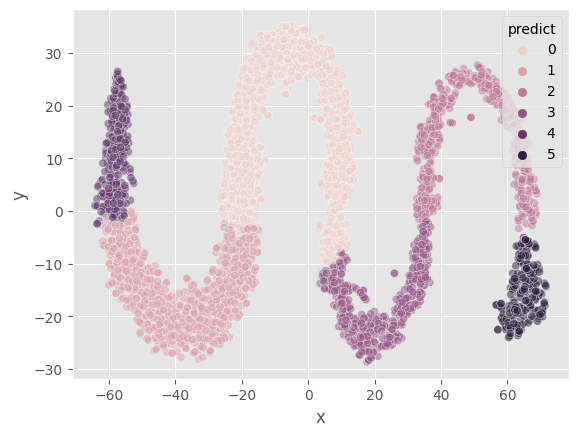

In [ ]:
sns.scatterplot(data=results3, x='x', y='y', sizes=5, alpha=0.5, hue="predict")
plt.show();

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric="euclidean")
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,3025,3026,3027,3028,3029,3030,3031,3032,3033,3034
0,0.000000,8.813387,2.719337,2.419681,4.665000,1.540262,5.623638,1.520176,1.620459,1.707004,...,118.834156,109.856605,96.027346,126.380620,129.305207,129.258583,131.110529,131.236104,112.640107,95.469110
1,8.813387,0.000000,9.273792,11.027719,5.766183,9.355815,3.204370,8.014802,10.433715,10.459545,...,110.026163,101.103121,87.228009,117.572724,120.596905,120.465726,122.498970,122.456750,103.873037,86.776794
2,2.719337,9.273792,0.000000,2.663617,6.678764,4.215835,6.398624,4.060526,3.157685,2.731430,...,118.918769,110.229196,96.211059,126.496793,128.982015,129.162137,130.630836,131.087268,112.974361,95.971492
3,2.419681,11.027719,2.663617,0.000000,7.062213,3.101654,7.892243,3.834983,1.236411,0.796191,...,120.998463,112.121775,98.226957,128.557790,131.287164,131.348713,133.009275,133.302650,114.893359,97.770858
4,4.665000,5.766183,6.678764,7.062213,0.000000,4.373351,3.137141,3.248729,6.035955,6.298833,...,115.113920,105.859191,92.221413,122.623298,126.045996,125.728709,128.051994,127.765418,108.676343,91.366561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,129.258583,120.465726,129.162137,131.348713,125.728709,129.787117,123.669931,128.453880,130.876861,130.858811,...,13.609176,28.343470,35.232651,10.811864,10.803629,0.000000,18.505599,3.179886,25.431713,41.708685
3031,131.110529,122.498970,130.630836,133.009275,128.051994,131.837320,125.670227,130.496268,132.701160,132.611580,...,28.769650,43.137199,44.418485,28.758519,7.759472,18.505599,0.000000,16.051010,40.758207,53.705171
3032,131.236104,122.456750,131.087268,133.302650,127.765418,131.792024,125.660693,130.456182,132.852512,132.824733,...,16.625887,31.459643,37.832459,13.761279,8.616099,3.179886,16.051010,0.000000,28.565862,44.658571
3033,112.640107,103.873037,112.974361,114.893359,108.676343,112.936972,107.027140,111.644023,114.250650,114.312393,...,12.271443,3.188066,17.676448,16.686592,33.610379,25.431713,40.758207,28.565862,0.000000,18.296880


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

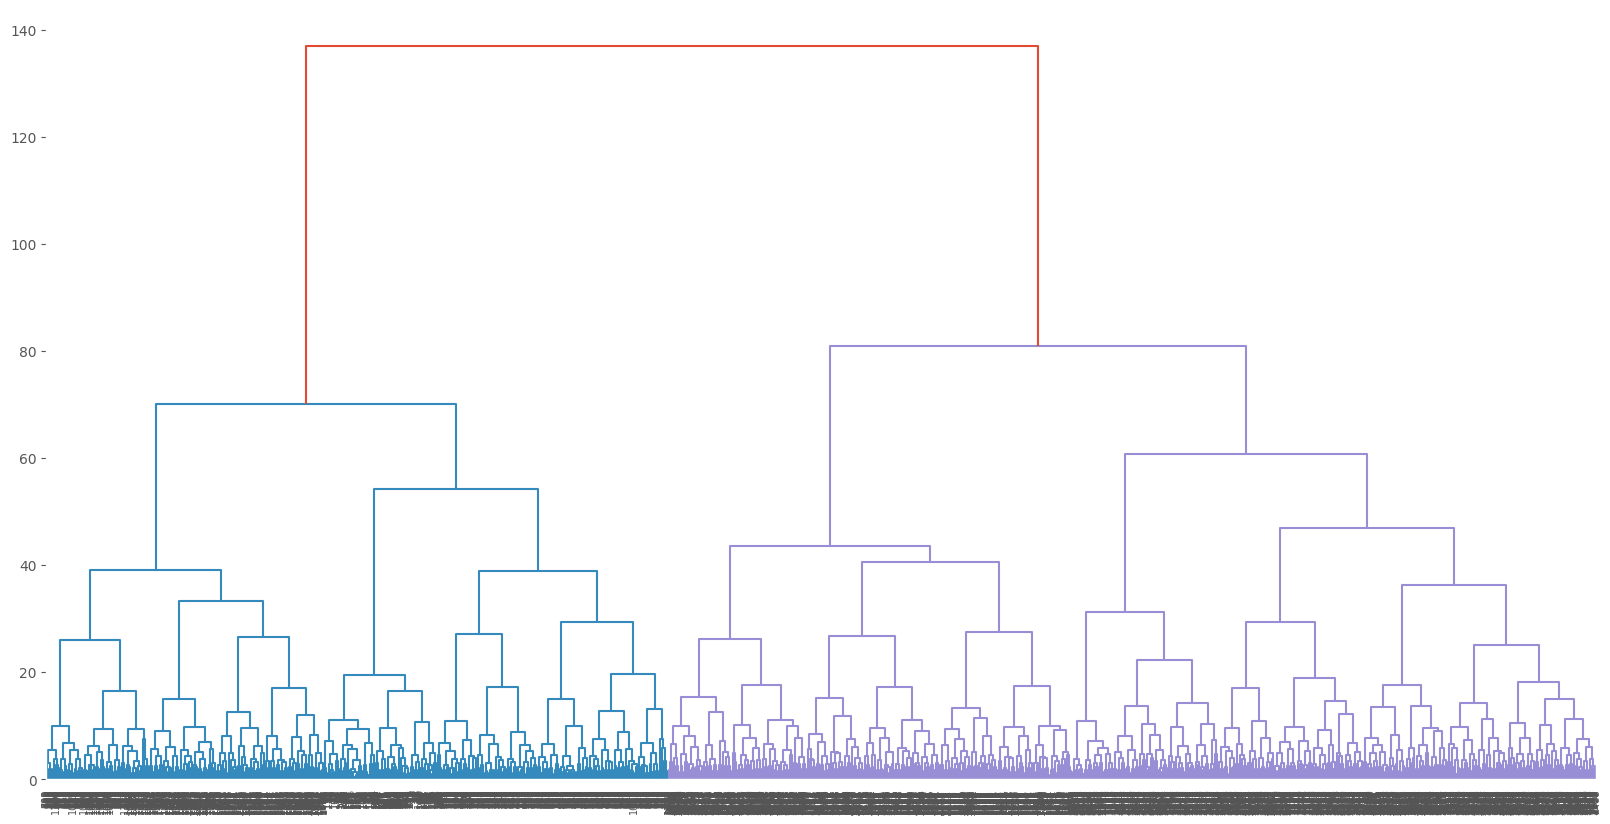

In [ ]:
row_clusters = linkage(distmatrix, method='complete')  # 완전연결법

plt.figure(figsize=(20,10))
dendrogram(
    Z=row_clusters,
    leaf_rotation=90,
    leaf_font_size=7
)
plt.show();

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

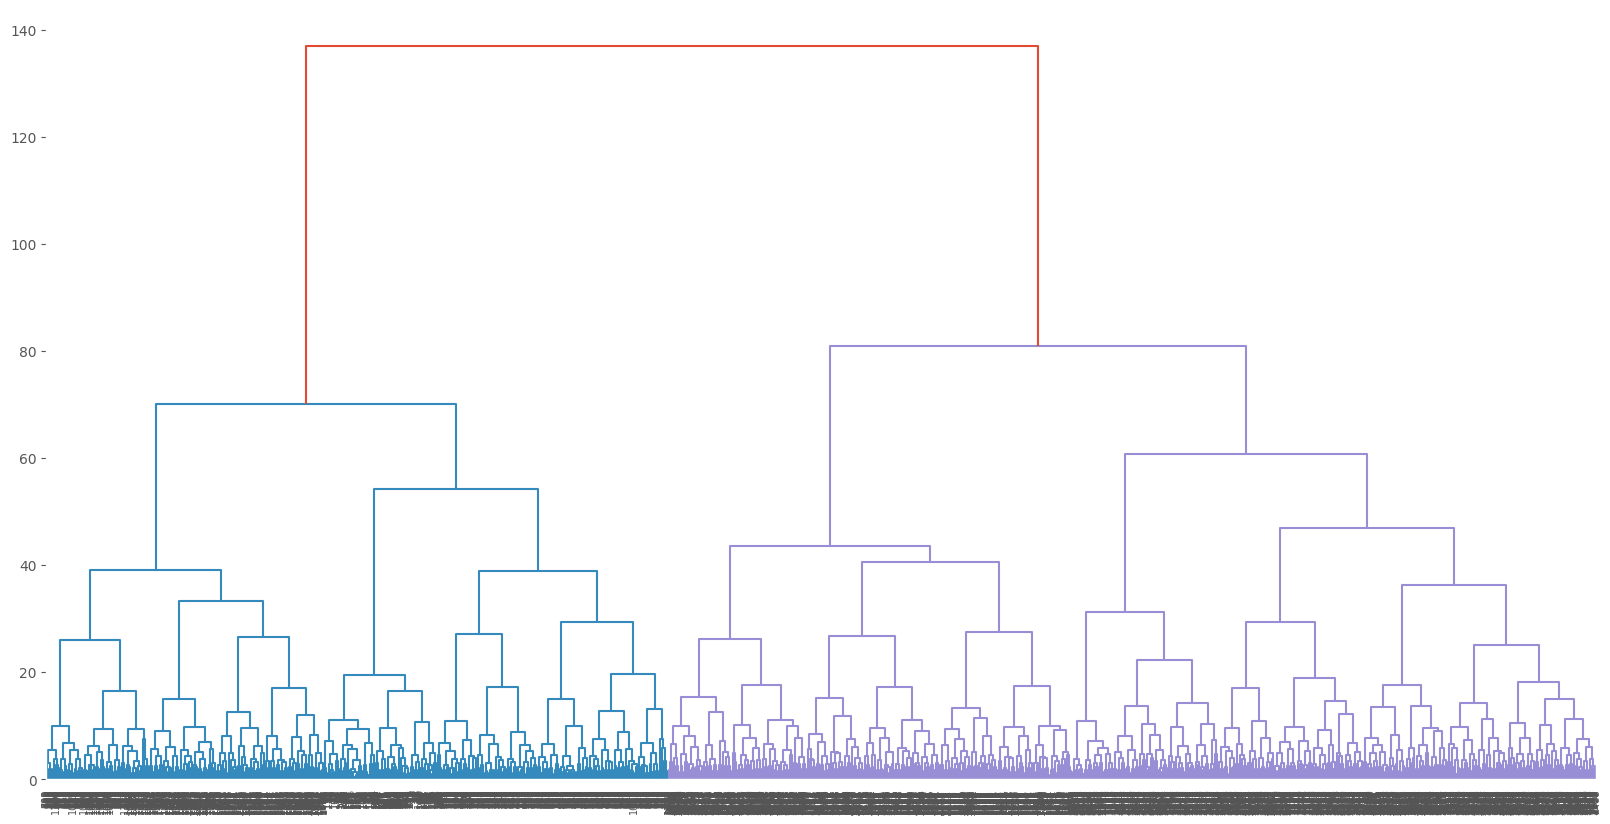

In [ ]:
row_clusters = linkage(df, method='complete')  # 완전연결법

plt.figure(figsize=(20,10))
dendrogram(
    Z=row_clusters,
    leaf_rotation=90,
    leaf_font_size=7
)
plt.show();

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
predict = kmeans.fit_predict(df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
result = df
result['predict'] = predict
result.head(10)

,x,y,predict
0,69.001472,-18.803402,1
1,60.225491,-17.992268,1
2,69.304382,-16.100988,1
3,71.252953,-17.917009,1
4,65.007622,-21.214083,1
5,69.287933,-20.316792,1
6,63.384510,-18.529467,1
7,67.998566,-19.945818,1
8,70.612839,-18.974821,1
9,70.674393,-18.463991,1


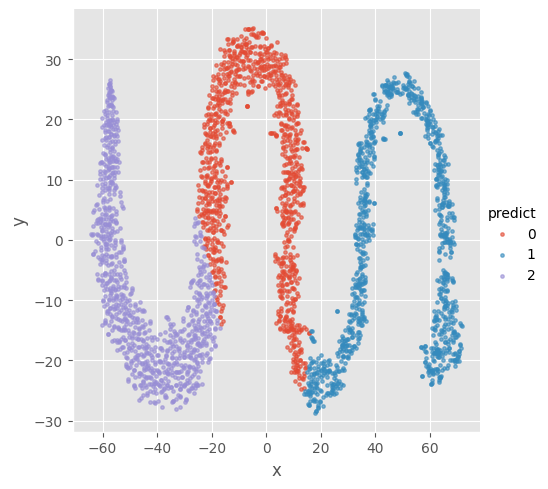

In [ ]:
sns.lmplot(data=result, x='x', y='y', fit_reg=False, scatter_kws={'s':6, 'alpha':0.6}, hue='predict')
plt.show();

### 클러스터 개수 6

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6)
predict = kmeans.fit_predict(df)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, ..., 1, 5, 5], dtype=int32)

In [ ]:
result = df
result['predict'] = predict
result.head(10)

,x,y,predict
0,69.001472,-18.803402,2
1,60.225491,-17.992268,2
2,69.304382,-16.100988,2
3,71.252953,-17.917009,2
4,65.007622,-21.214083,2
5,69.287933,-20.316792,2
6,63.384510,-18.529467,2
7,67.998566,-19.945818,2
8,70.612839,-18.974821,2
9,70.674393,-18.463991,2


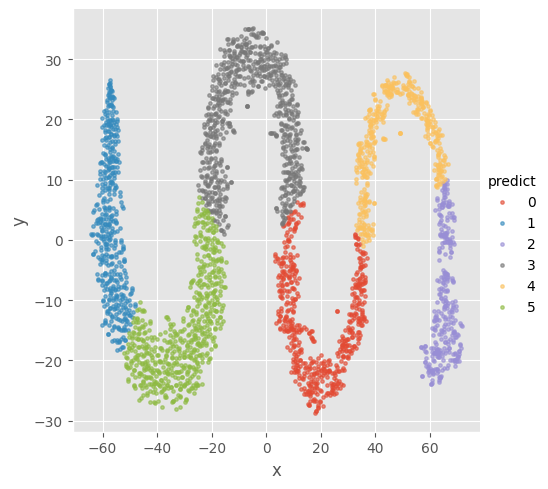

In [ ]:
sns.lmplot(data=result, x='x', y='y', fit_reg=False, scatter_kws={'s':6, 'alpha':0.6}, hue='predict')
plt.show();